## Домашняя работа по теме "Создание признакового пространства"

### Задание 1.

**Задание**: обучите три классификатора: 

1) на токенах с высокой частотой 

2) на токенах со средней частотой 

3) на токенах с низкой частотой


Сравните полученные результаты, оцените какие токены наиболее важные для классификации.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import re
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Conv1D, GRU, LSTM, Dropout
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [2]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = pd.concat([positive, negative])

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [4]:
clf = LogisticRegression(random_state=42)

In [5]:
nltk.download('stopwords')
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Полина\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
noise = stopwords.words('russian') + list(punctuation)

In [7]:
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

2870536


['first_timee', 'хоть', 'я', 'и', 'школота', 'но', 'поверь', 'у', 'нас', 'то']

In [8]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860)]

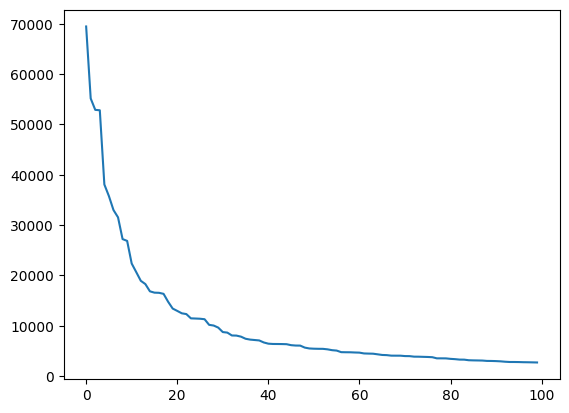

In [9]:
%matplotlib inline
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

In [10]:
# Токены с высокой частотой
high_freuq_tockens = [word for word, freq in freq_dict_sorted[:40]]

# Токены с средней частотой
median_freaq_tockens = [word for word, freq in freq_dict_sorted[40:80]]

# Токены с низкой частотой
low_freaq_tockens = [word for word, freq in freq_dict_sorted[80:]]


Обучение на токенах с высокой частотой

In [11]:
vec = CountVectorizer(ngram_range=(1, 1), vocabulary=high_freuq_tockens, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

c:\Users\Полина\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:1375: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.84      0.53      0.65     44544
    positive       0.27      0.63      0.37     12165

    accuracy                           0.55     56709
   macro avg       0.55      0.58      0.51     56709
weighted avg       0.72      0.55      0.59     56709



Обучение на токенах с средней частотой

In [12]:
vec = CountVectorizer(ngram_range=(1, 1), vocabulary=median_freaq_tockens, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

c:\Users\Полина\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:1375: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.14      0.64      0.24      6358
    positive       0.92      0.52      0.67     50351

    accuracy                           0.54     56709
   macro avg       0.53      0.58      0.45     56709
weighted avg       0.83      0.54      0.62     56709



Обучение на токенах с низкой частотой

In [13]:
vec = CountVectorizer(ngram_range=(1, 1), vocabulary=low_freaq_tockens, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

c:\Users\Полина\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:1375: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
c:\Users\Полина\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.75      0.74      0.74     28300
    positive       0.74      0.75      0.75     28409

    accuracy                           0.74     56709
   macro avg       0.74      0.74      0.74     56709
weighted avg       0.74      0.74      0.74     56709



Вывод: лучше всего предсказания на токенах с низкой частотой. Токены с высокой частотой не несут полезной информации, так как встречаются одинакого во всех текстах, что не скажешь о токенах с низкой частотой, которые лучше описывают смысл текста.

In [14]:
vec = CountVectorizer(vocabulary=low_freaq_tockens, stop_words=noise)

### Задание 2.

найти фичи с наибольшей значимостью, и вывести их

In [15]:
# Получаем массив коэффициентов
coefficients = clf.coef_[0]

# Получаем список всех признаков
features = vec.get_feature_names_out()

# Сортируем список признаков по коэффициентам
feature_coefficients = list(zip(features, coefficients))
sorted_features = sorted(feature_coefficients, key=lambda x: x[1], reverse=True)

# Выводим 10 признаков с наибольшими коэффициентами
for feature, coef in sorted_features[:30]:
    print(feature, coef)

xd 4.229408493314157
dddd 4.222952696614455
отличного 3.032883374490399
улыбнуло 2.7406640186401985
читатель 2.6801136685585223
chlenschmidta 2.6279240552262673
ахахахахаха 2.499515051079222
прекрасного 2.4476361450732025
спасииибо 2.436120552278703
полезно 2.3505936340205453
рекомендую 2.3505346663080315
наблюдаю 2.3063022080218607
поздравляю 2.302698326730023
juljulianapai 2.2265091535676738
совпадение 2.2159927285303183
социальная 2.2035117581996047
ахахахах 2.143653800138847
кайфую 2.1415464410675926
постепенно 2.13260259466389
планируем 2.12583712558153
поздравляем 2.1005946894284393
поднимает 2.0998924970566986
chriscalfer 2.080264441805241
замечательная 2.0685219479446983
наконецто 2.0553074748393056
упоротый 2.0519790518404153
обращайся 2.016536531443976
еееее 2.0076095204699924
аххах 2.0047583719671036
maksimofficial 2.004540483819752


### Задание 3.

1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера 

3) убедиться что для сетки нет переобучения

In [16]:
vec = HashingVectorizer(n_features=10000, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

c:\Users\Полина\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.68      0.70      0.69     27129
    positive       0.72      0.69      0.71     29580

    accuracy                           0.70     56709
   macro avg       0.70      0.70      0.70     56709
weighted avg       0.70      0.70      0.70     56709



hashing векторайзеры быстрее обучаются и дают лучше прогноз при увеличении количества фичей, но не интрепритируемы

In [17]:
vec = TfidfVectorizer(vocabulary=low_freaq_tockens, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

c:\Users\Полина\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:1375: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
c:\Users\Полина\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.71      0.75      0.73     26358
    positive       0.77      0.73      0.75     30351

    accuracy                           0.74     56709
   macro avg       0.74      0.74      0.74     56709
weighted avg       0.74      0.74      0.74     56709



tf-idf не сильно отличается от count векторайзера

In [18]:
df['label'] = df['label'].map({'negative': 1, 'positive': 0})

In [19]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [text, label]
Index: []


In [20]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [21]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [25]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))


for row in train_data.take(3):
  print(row)

(<tf.Tensor: shape=(), dtype=string, numpy=b'@locamente_Sh \xd0\xbe\xd0\xbe\xd0\xbe\xd1\x83, \xd1\x89\xd0\xb5\xd1\x82\n\xd0\xb0 \xd1\x8f \xd1\x82\xd0\xbe \xd0\xb4\xd1\x83\xd0\xbc\xd0\xb0\xd1\x8e, \xd1\x87\xd0\xb5\xd0\xb3\xd0\xbe \xd0\xbe\xd0\xbd \xd1\x82\xd0\xb0\xd0\xba\xd0\xbe\xd0\xb9 \xd0\xb3\xd1\x80\xd1\x83\xd1\x81\xd1\x82\xd0\xbd\xd1\x8b\xd0\xb9 \xd0\xb1\xd1\x8b\xd0\xbb :D'>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'1 \xd1\x8f\xd0\xbd\xd0\xb2\xd0\xb0\xd1\x80\xd1\x8f \xd0\xb1\xd1\x8b\xd0\xbb\xd0\xbe \xd0\xbe\xd1\x87\xd0\xb5\xd0\xbd\xd1\x8c \xd0\xba\xd1\x80\xd1\x83\xd1\x82\xd0\xbe\xd0\xb5\xe2\x9d\xa4\xef\xb8\x8f \xd0\xbf\xd0\xbe\xd0\xbb\xd1\x8f \xd0\xb1\xd1\x8b \xd1\x84\xd0\xbe\xd1\x82\xd0\xba\xd1\x83 \xd0\xb7\xd0\xb0\xd1\x86\xd0\xb5\xd0\xbd\xd0\xb8\xd0\xbb\xd0\xb0;( http://t.co/RbyccdvOzN'>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'\xd0\x90 \xd1\x80\xd0\xbe\xd0\xb4\xd0\xb8\xd1\x82\xd0\x

In [27]:
train_dataset = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = valid_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [51]:
VOCAB_SIZE = 10000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [52]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'не', 'и', 'в', 'я', 'rt', 'на', 'что', 'с', 'а',
       'меня', 'у', 'как', 'так', 'мне', 'это', 'все', 'ты', 'Я'],
      dtype='<U33')

In [53]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [54]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [55]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
2659/2659 [==============================] - 219s 76ms/step - loss: 0.5549 - accuracy: 0.6826 - val_loss: 0.5031 - val_accuracy: 0.7479
Epoch 2/10
2659/2659 [==============================] - 163s 61ms/step - loss: 0.4772 - accuracy: 0.7553 - val_loss: 0.5006 - val_accuracy: 0.7359
Epoch 3/10
2659/2659 [==============================] - 173s 65ms/step - loss: 0.4589 - accuracy: 0.7684 - val_loss: 0.4974 - val_accuracy: 0.7432
Epoch 4/10
2659/2659 [==============================] - 172s 65ms/step - loss: 0.4469 - accuracy: 0.7773 - val_loss: 0.5008 - val_accuracy: 0.7401
Epoch 5/10
2659/2659 [==============================] - 181s 68ms/step - loss: 0.4371 - accuracy: 0.7840 - val_loss: 0.5102 - val_accuracy: 0.7411
Epoch 6/10
2659/2659 [==============================] - 202s 76ms/step - loss: 0.4282 - accuracy: 0.7893 - val_loss: 0.5118 - val_accuracy: 0.7427
Epoch 7/10
2659/2659 [==============================] - 186s 70ms/step - loss: 0.4200 - accuracy: 0.7951 - val_loss: 0

In [56]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

887/887 [==============================] - 14s 16ms/step - loss: 0.5471 - accuracy: 0.7383
Test Loss: 0.5471295714378357
Test Accuracy: 0.7382778525352478


In [71]:
from importlib import reload
plt=reload(plt)

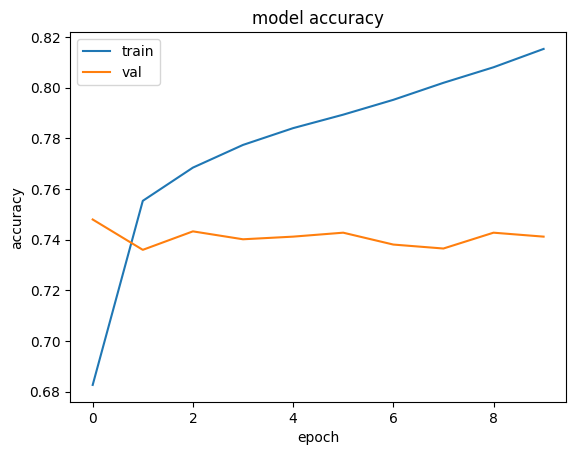

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

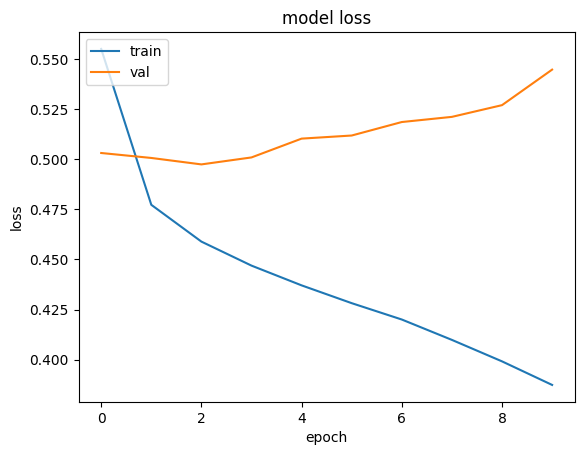

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()